In [82]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [84]:
filename = "C:/Users/gheva/OneDrive/Desktop/zoo 1.csv"
names = [
    'hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:16]
Y = array[:, 16]

In [86]:
dataframe

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [90]:
dataframe.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [72]:
dataframe.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

In [74]:
dataframe.boxplot()

<Axes: >

In [92]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [94]:
X=(X-X.min())/(X.max()-X.min())

In [96]:
X

array([[0.125, 0.   , 0.   , ..., 0.   , 0.   , 0.125],
       [0.125, 0.   , 0.   , ..., 0.125, 0.   , 0.125],
       [0.   , 0.   , 0.125, ..., 0.125, 0.   , 0.   ],
       ...,
       [0.125, 0.   , 0.   , ..., 0.125, 0.   , 0.125],
       [0.   , 0.   , 0.125, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.125, 0.125, ..., 0.125, 0.   , 0.   ]])

In [98]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [100]:
model = KNeighborsClassifier(n_neighbors=7)
results = cross_val_score(model, X, Y, cv=kfold)

In [102]:
results

array([1. , 0.6, 0.8, 1. , 0.9, 0.9, 0.8, 0.5, 0.8, 0.9])

In [104]:
print(results.mean())

0.82


##Grid Search Algorithm for Hyperparameter Tuning##

In [106]:

import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [108]:
filename = "C:/Users/gheva/OneDrive/Desktop/zoo 1.csv"
names = [
    'hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:16]
Y = array[:, 16]

In [110]:

X=(X-X.min())/(X.max())-X.min()

In [112]:

n_neighbors = np.array([2*i+1 for i in range(0,20)]) 
param_grid = dict(n_neighbors=n_neighbors)

In [114]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [116]:

n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

In [118]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)


C:\Users\gheva\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [120]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


##Visualizing the CV results##

In [122]:
k_range = range(1,41)
k_scores = []


for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, X, Y, cv=kfold, scoring='accuracy')
    
    k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

0     0.980000
2     0.940000
1     0.940000
3     0.920000
4     0.880000
5     0.860000
6     0.820000
14    0.780000
19    0.780000
18    0.780000
17    0.780000
16    0.780000
15    0.780000
20    0.780000
13    0.780000
12    0.780000
11    0.780000
10    0.780000
9     0.780000
8     0.780000
7     0.780000
21    0.750000
22    0.730000
23    0.710000
29    0.700000
28    0.700000
27    0.700000
26    0.700000
25    0.700000
24    0.700000
30    0.662727
31    0.632727
32    0.622727
33    0.582727
34    0.582727
35    0.582727
36    0.582727
37    0.572727
38    0.572727
39    0.572727
dtype: float64

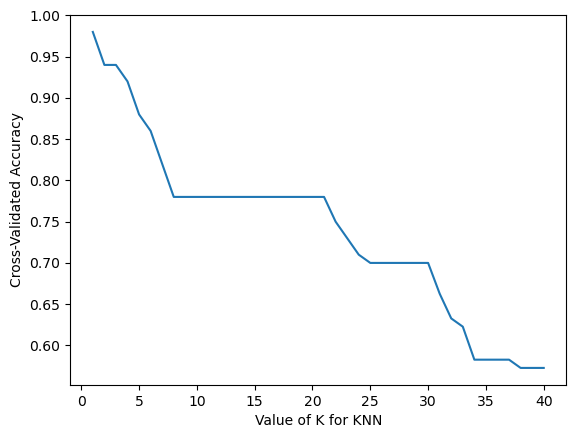

In [126]:
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Interview Questions##

In [ ]:
1. What are the key hyperparameters in KNN?

In [ ]:
Ans: K(Number of Neighbores)- Determines how many neighbors influence the classification.
Distance metric-Common choices:Euclidean,Manhattan,Minkowski
    Weighting Function-Uniform or distance-based 
    Algorithm-Choice of search algorithm(Ball Tree,KD tree or brute force)
    Leaf size-Affects tree-based search efficiency

In [ ]:
2. What distance metrics can be used in KNN?

In [ ]:
Ans:
1.Euclidean Distance
2.Manhattan Distance
3.Minkowski Distance
4.Hamming Distance
5.Cosine Similarity
6.Mahalanobis Distance